# This is Section 2 of Coursework 2
-----------------------------------------------------------

In this exercise, you will implement manually the GD algorithm and compare the result with that of
sklearn. The optimal point obtained from the GD algorithm should be similar to that of sklearn for at least two decimal places. You will use CC dataset which is downloaded within this script for you.

You can find the exercise parts by looking for word "Exercise" using Ctrl+F. There is only one excercise for this section. You may need to install and load certain packages in order for the code to run. Some packages are loaded below.

Marks for each exercise are shown in brakcets; note that these marks are provisional and they might be changed.
-------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#To import data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
# In this notebook, we wil implement logistic manually using gradient descent.
# The data used is from make_classification in Scikit-learn.
# Note that we do not do any cross validation or accuracy testing.
# You should try adjusting the model, for instance by taking different learning rate or iterations.
# Load CSV from URL using NumPy and perform some pre-processing
np.random.seed(3)
url = "https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv"
names = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default']
df = pd.read_csv(url, names=names)
df = df.drop(['ID'], axis = 1)
names = names[1:np.size(names,0)]
print(df.shape)
# Convert to numeric
for column in df:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.dropna()
#checking NaN values if there is any then data will be sanitized 
for column in df:
    if df[column].isnull().values.any():
        print("NaN value/s detected in "+column)
    else:
        print("{} no null values".format(column))
        
# rescale sex (sex : male = 0 , female = 1)
df['SEX'][df['SEX']==1]=0
df['SEX'][df['SEX']==2]=1
# rescale marital status (married = 0, single = 1) after dropping 'others'
todrop0 = df[df['MARRIAGE']==3].index
df['MARRIAGE'][df['MARRIAGE']==1]=0
df['MARRIAGE'][df['MARRIAGE']==2]=1
df.drop(todrop0 , inplace=True)
# remove unkonown from education
todrop1 = df[df['EDUCATION']==5].index
todrop2 = df[df['EDUCATION']==6].index
df.drop(todrop1 , inplace=True)
df.drop(todrop2 , inplace=True)



(30001, 24)
LIMIT_BAL no null values
SEX no null values
EDUCATION no null values
MARRIAGE no null values
AGE no null values
PAY_0 no null values
PAY_2 no null values
PAY_3 no null values
PAY_4 no null values
PAY_5 no null values
PAY_6 no null values
BILL_AMT1 no null values
BILL_AMT2 no null values
BILL_AMT3 no null values
BILL_AMT4 no null values
BILL_AMT5 no null values
BILL_AMT6 no null values
PAY_AMT1 no null values
PAY_AMT2 no null values
PAY_AMT3 no null values
PAY_AMT4 no null values
PAY_AMT5 no null values
PAY_AMT6 no null values
Default no null values


In [3]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1    20000.0  1.0        2.0       0.0  24.0    2.0    2.0   -1.0   -1.0   
2   120000.0  1.0        2.0       1.0  26.0   -1.0    2.0    0.0    0.0   
3    90000.0  1.0        2.0       1.0  34.0    0.0    0.0    0.0    0.0   
4    50000.0  1.0        2.0       0.0  37.0    0.0    0.0    0.0    0.0   
5    50000.0  0.0        2.0       0.0  57.0   -1.0    0.0   -1.0    0.0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
1   -2.0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2    0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3    0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4    0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5    0.0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
1       0.0       0.0       0.0      1.0  
2    1000.0       0.0    2000.0      1.0  
3    1000.0    1000.0    5000.0      0.0  
4    1100.0    1069.0    1000.0      0.0  
5    9000.0     689.0     679.0      0.0  

[5 rows x 24 columns]

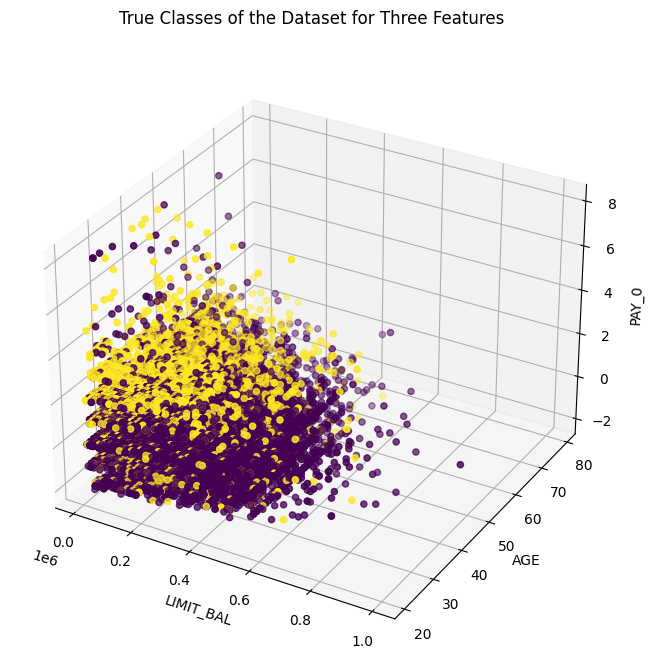

In [4]:
#A three dimensional scatter plot
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(projection='3d')

x =df['LIMIT_BAL']
y =df['AGE']
z =df['PAY_0']



ax.scatter(x, y, z, c=df['Default'])

ax.set_xlabel('LIMIT_BAL')
ax.set_ylabel('AGE')
ax.set_zlabel('PAY_0')

plt.title('True Classes of the Dataset for Three Features\n')

plt.show()

In [5]:
df_features = df.iloc[:,:-1]
y = df['Default']

In [6]:
#Standardising data
mu = np.mean(df_features, axis=0)
sigma = np.std(df_features, axis=0)

x_data = (df_features - mu)/sigma

In [7]:
x_data.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
1  -1.140744  0.810575   0.263866 -1.080984 -1.241198  1.791548  1.776467   
2  -0.371375  0.810575   0.263866  0.925083 -1.023256 -0.872583  1.776467   
3  -0.602185  0.810575   0.263866  0.925083 -0.151489  0.015461  0.110937   
4  -0.909933  0.810575   0.263866 -1.080984  0.175424  0.015461  0.110937   
5  -0.909933 -1.233692   0.263866 -1.080984  2.354844 -0.872583  0.110937   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
1 -0.694731 -0.664406 -1.524908  ...  -0.666843  -0.671651  -0.662878   
2  0.138203  0.188506  0.233878  ...  -0.638056  -0.620776  -0.606061   
3  0.138203  0.188506  0.233878  ...  -0.480945  -0.448823  -0.417059   
4  0.138203  0.188506  0.233878  ...   0.035179  -0.231406  -0.186648   
5 -0.694731  0.188506  0.233878  ...  -0.159183  -0.346062  -0.348023   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
1  -0.652890 -0.355990 -0.234911 -0.307906 -0.314103 -0.316369 -0.294050  
2  -0.598179 -0.355990 -0.220811 -0.248546 -0.248958 -0.316369 -0.180821  
3  -0.392021 -0.260170 -0.198143 -0.248546 -0.248958 -0.250404 -0.010976  
4  -0.157174 -0.229745 -0.174614 -0.236674 -0.242443 -0.245853 -0.237435  
5  -0.331925 -0.229745  1.396836  0.285696  0.272209 -0.270920 -0.255609  

[5 rows x 23 columns]

In [8]:
# Adding a columns of ones, and split dataset into training set, cv set, and test set 
n_samples = x_data.shape[0]
x_data_1 = np.hstack((np.ones((n_samples,1)),x_data))

default_seed = 1
x_train, x_test, y_train, y_test = train_test_split(x_data_1, y, test_size=0.6,
                                                                  random_state=default_seed) 
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5,
                                                                  random_state=default_seed) 



In [9]:
#Let us fit a logisitc regression with an l2 penalrty and find the otpimal parameters
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',solver='lbfgs',fit_intercept=False)
clf.fit(x_train, y_train)
clf.coef_

array([[-1.45737984, -0.10224267, -0.06428344, -0.08791004, -0.04596952,
         0.12587009,  0.67068078,  0.11690997,  0.04313875, -0.00689296,
         0.06229694,  0.03285021, -0.52857971,  0.34977959,  0.00390949,
         0.19853547, -0.07450939, -0.07515571, -0.26267535, -0.12333435,
        -0.16673331, -0.05984814, -0.01676188, -0.05650813]])

In [20]:
#Exercise 1 ---  [6/30]
#The purpose of this exercise is to obtain the estimated optimal parameters in the above logit model
#by implementing the gradient descdent algorithm. 

#Write down a function, named  gradient_descent,
#that takes the inputs ""(x_train, y_train, params, learning_rate, n_iters)""
#and returns two vectors: the first is a vector of losses per iteration and the second is the 
#estimated optimal parameters in the logid model. Note that here "params" is the initial parameters in
#the GD algorithm.

#The optimal point obtained from the GD algorithm should be similar to that of sklearn for at least two decimal places.

#You will test this function in the next block. In this block you only have your function. 
#


#
#----------------------------------
#Write your code bellow

def gradient_descent(x_train, y_train, params, learning_rate, n_iterations):
    m = len(y_train)
    params = np.random.randn(2,1)
    
    for iteration in range(n_iterations):
        gradients = 2 * x_train.T.dot(x_train.dot(params)) - y_train
        params = params - learning_rate * gradients
        params

#----------------------------------






In [21]:
#You might use different interation numbers or learning rate and observe the effect
from sklearn.metrics import log_loss
n_iterations = 2000
learning_rate = 1
n_features = x_train.shape[1]

np.random.seed(seed=1)
params=np.random.randn(n_features)
initial_loss = log_loss(np.array(x_train),np.array(y_train), params)


print("The initial error is: ", initial_loss, "\n")



(error, optimal_params2) = gradient_descent(x_train, y_train, params, learning_rate, n_iterations)

print("The optimal parameters for the GD implementation are: ")
print()
print(np.array(optimal_params2), "\n")

print("The final error of the GD implementation is: ", error[-1])

plt.plot(range(len(error)), error, 'r')

plt.title("Error Function versus the Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.show()

/home/dommy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


ValueError: Multioutput target data is not supported with label binarization

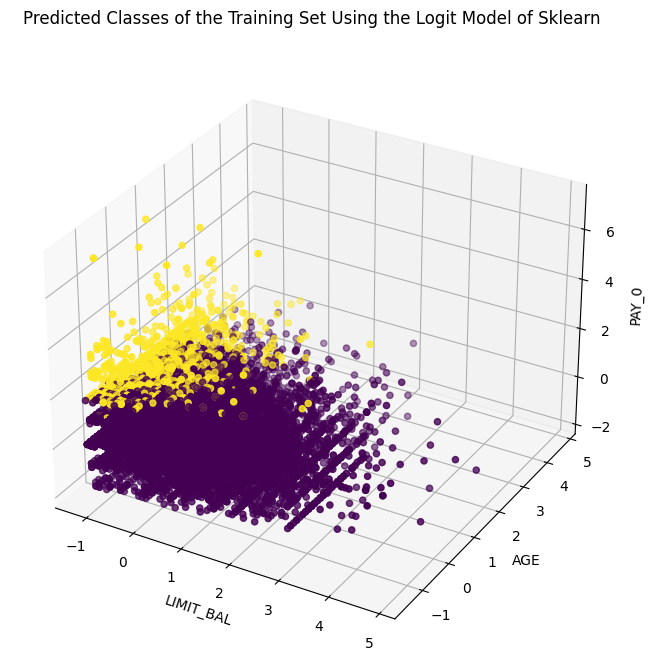

In [22]:
#A three dimensional scatter plot using the predicted values
x_train_n = pd.DataFrame(x_train,columns=pd.Index(['Bias']).append(x_data.columns))
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(projection='3d')

x = x_train_n['LIMIT_BAL']
y = x_train_n['AGE']
z = x_train_n['PAY_0']



ax.scatter(x, y, z, c=clf.predict(x_train_n))

ax.set_xlabel('LIMIT_BAL')
ax.set_ylabel('AGE')
ax.set_zlabel('PAY_0')

plt.title('Predicted Classes of the Training Set Using the Logit Model of Sklearn\n')

plt.show()